# Definisi

Recall atau Sensitivity (True Positive Rate) menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Nilai recall dapat diperoleh dengan persamaan.

# Cara Menghitung

Untuk mencari nilai recall harus ditentukan nilai dari masing-masing kelasnya, yang kemudian akan ditentukan nilai rerata dari masing recall tersebut. Contoh penyelesaian:

Rumus Recall / Sensitivity = TP / (TP + FN)

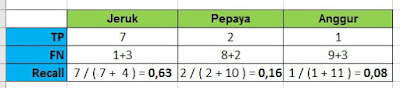

Setelah sudah ditentukan nilai masing-masing recall dari setiap kelas nya, seperti tadi kamu harus mencari nilai rerata dari semua nilai dengan menjumlahkan dan dibagi jumlah kelas.

Rumusnya adalah

- All Recall = Recall A + B + C / Jumlah Kelas
- 0,63 + 0,16 + 0,08 / 3 = 0,29

# Implementasi Metode

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

## Dataset

In [2]:
# Importing of dataset to dataframe
df = pd.read_csv('iris.csv', names=["Sepal Length","Sepal Width","Petal Length","Petal Width","Variety"])

In [3]:
# To see first 5 rows of the dataset
df.head()
# To know the data types of the variables.
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Variety          object
dtype: object

In [4]:
# Variety is the output class,to know the count of each class we use value_counts()
df['Variety'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Variety, dtype: int64

In [5]:
# Separating independant variable and dependent variable("Variety")
X = df.drop(['Variety'], axis=1)
y = df['Variety']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


## Split the data

In [6]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# To know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


## Training and predicting data

In [8]:
# We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [9]:
# Training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [10]:
# Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

## Confusion Matrix

In [11]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [12]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'], 
                     columns = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])

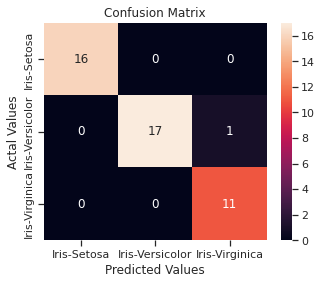

In [13]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [14]:
# Setosa
TPs = 1
TNs = 29
FPs = 0
FNs = 0

# Versicolor
TPv = 17
TNv = 27
FPv = 0
FNv = 1

## Basic Metrics Recall

### Setosa

In [15]:
results = {}

#### True Positive Rate

In [16]:
metric = "TPR"
results[metric] = TPs / (TPs + FNs)
print(f"{metric} is {results[metric]: .3f}")

TPR is  1.000


#### True Negative Rate

In [17]:
metric = "PPV"
results[metric] = TPs / (TPs + FPs)
print(f"{metric} is {results[metric]: .3f}")

PPV is  1.000


#### F1 Score

In [18]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  1.000


#### Membandingkan metrik yang telah dihitung

In [19]:
print(f"Calculated dan Actual Recall score: {results['TPR']: .3f}, {metrics.recall_score(y_test, y_pred, average='micro'): .3f}")

Calculated dan Actual Recall score:  1.000,  0.978


### Versicolor

In [20]:
results = {}

#### True Positive Rate

In [21]:
metric = "TPR"
results[metric] = TPv / (TPv + FNv)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.944


#### True Negative Rate

In [22]:
metric = "PPV"
results[metric] = TPv / (TPv + FPv)
print(f"{metric} is {results[metric]: .3f}")

PPV is  1.000


#### F1 Score

In [23]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.971


#### Membandingkan metrik yang telah dihitung

In [24]:
print(f"Calculated dan Actual Recall score: {results['TPR']: .3f}, {metrics.recall_score(y_test, y_pred, average='micro'): .3f}")

Calculated dan Actual Recall score:  0.944,  0.978
